<a href="https://colab.research.google.com/github/andregustavo04/Data-Science/blob/main/Classificacao_Estilo_Musical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Machine Learning e Estilos Musicais


A imagem abaixo foi gerada por uma inteligência artificial a partir de alguns simples comandos descritivos. A capacidade abstrativa que um computador consegue atingir é algo incrível, principalemtne quando se trata da arte. Contudo, se uma IA é capaz de gerar algo tão complexo a partir de simples comandos, o que mais ela consegue fazer?
<br>

<img src="https://cdn.midjourney.com/c17694af-ab1d-4e2b-9471-865a00d92526/grid_0.png" height=500px>


<br>
<br>

Com o imenso poder demonstrado pelas inteligências artificiais nos dias de hoje, é possível perceber que a aplicabilidade de IA não tem limite - podemos aplicar IA em qualquer cenário ou segmento de maneira a nos ajudar a alcançar melhores resultados, de maneira mais eficiente. [Uma recente pesquisa realizada pela IBM](https://exame.com/esferabrasil/pesquisa-mostra-que-41-das-empresas-brasileiras-ja-utilizam-inteligencia-artificial/) apontou que aproximadamente 41% das empresas brasileiras já utilizam inteligência artifical (IA) em suas operações, o que nos leva a pensar que as IA's estão sendo utilizadas massivamente para diferentes tipos de funções.  


Sendo assim, para explorar a imensa aplicabilidade da IA, por que não criamos algo um tanto quanto diferente? Vamos criar um modelo de machine learning (IA) para fazer a classificação do estilo musical de uma música. O desafio de hoje é construir um modelo de machine learning para classificar as músicas em Rock ou Hip-Hop, a partir de algumas das características dessas músicas, tais como título, gravadora, duração etc.

Para isso, vamos olhar para os dados já conhecidos de algumas músicas, para podermos treinar nosso modelo e torná-lo capaz de fazer novas previsões a partir de dados de músicas nunca vistas por ele antes. Este é um típico problema de Aprendizado Supervisionado.

<br>




## Objetivo
>Classificar os estilos das músicas em Rock ou Hip-Hop.

## Métrica de Performance
>Para avaliar a performance do nosso modelo, utilizaremos as métricas "Acurácia" e "F1 Score".






#2. Importando os Dados

Os dados utilizados para este modelo estão disponíveis no Kaggle (https://www.kaggle.com) para download. Utilizaremos dois datasets:

* **Dataset 1:** [Dataset 1](https://www.kaggle.com/datasets/efstathiasdrolia/fmarockvshiphop) (arquivo csv)
* **Dataset 2:** [Dataset 2](https://www.kaggle.com/datasets/efstathiasdrolia/echonestmetrics) (arquivo json)

Antes de tudo, vamos importar as bibliotecas que utilizaremos a priori para fazer a análise dos dados.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Vamos carregar os dados dos arquivos para estruturas chamadas de DataFrame, da biblioteca Pandas.

In [ ]:
df_tracks = pd.read_csv('/content/drive/MyDrive/00 - Modelos de ML e Análises/ML - CLASSIFICAÇÃO DE ESTILO MUSICAL/fma-rock-vs-hiphop.csv')
df_echo = pd.read_json('/content/drive/MyDrive/00 - Modelos de ML e Análises/ML - CLASSIFICAÇÃO DE ESTILO MUSICAL/echonest-metrics.json')

Para começar a entender como nossos dados são, vamos olhar as primeiras linhas de cada DataFrame, por meio do método `head()`.

In [ ]:
df_tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [ ]:
df_echo.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


Vejamos a quantidade de linhas e colunas do primeiro DataFrame.

In [ ]:
print(f'Estrutura do dataframe: \n Linhas:{df_tracks.shape[0]} \n Colunas: {df_tracks.shape[1]}') 
print()
print(f'Colunas do dataframe: {list(df_tracks.columns)}')

Estrutura do dataframe: 
 Linhas:17734 
 Colunas: 21

Colunas do dataframe: ['track_id', 'bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'duration', 'favorites', 'genre_top', 'genres', 'genres_all', 'information', 'interest', 'language_code', 'license', 'listens', 'lyricist', 'number', 'publisher', 'tags', 'title']


Vejamos a quantidade de linhas e colunas do segundo DataFrame.

In [ ]:
print(f'Estrutura do dataframe: \n Linhas: {df_echo.shape[0]} \n Colunas: {df_echo.shape[1]}') 
print()
print(f'Colunas do dataframe: {list(df_echo.columns)}')

Estrutura do dataframe: 
 Linhas:13129 
 Colunas: 9

Colunas do dataframe: ['track_id', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']


Verificando valores missing.

In [ ]:
df_tracks.isnull().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [ ]:
df_echo.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64

Podemos notar que no DataFrame "df_tracks" há colunas com praticamente todos os valores missing, diferente do DataFrame "df_echo", que não apresenta nenhum valor missing.

Verificando os tipos das variáveis.

In [ ]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [ ]:
df_echo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


Vamos analisar algumas estatísticas descritivas das variáveis.

In [ ]:
df_tracks.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [ ]:
df_echo.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


# 2.1. Juntando os Dois Datasets

Vamos juntar os dois DataFrames em um só para podermos trabalhar melhor. 

A estrutura para a união dos dois DataFrames será baseada na estrutura do DataFrame "df_echo", sendo que do dataset "df_tracks" vamos pegar apenas as colunas "track_id" e "genre_top".

Veja que essa abordagem para a junção dos dois DataFrames resolve o problema dos valores missing no DataFrame "track_id".

In [ ]:
df_complete = pd.merge(df_echo, df_tracks[['track_id', 'genre_top']], on='track_id')
df_complete

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


Agora temos um DataFrame com 4802 entradas e 10 colunas.

# 3. Divisão Entre Teste e Treino

Antes de começarmos a fazer análises e a manipular nossos dados efetivamente, devemos separá-los em dados de treino e dados de teste. Esta separação é de suma importância para que não tenhamos problemas de **'data leakage'** e **'overfitting'**. 

Em primeiro lugar, vamos separar nossas variáveis previsoras da nossa variável target. As variáveis previsoras são aquelas que serão utilizadas para o modelo para fazer a previsão da variável target.


In [ ]:
features = df_complete.drop(columns=['genre_top', 'track_id'])
labels = df_complete['genre_top']

Agora, vamos separar os conjuntos de teste e de treino.

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

# 4. Criação do Modelo, com Pipeline

Para fazer a classificação dos estilos musicais das músicas, utilizaremos o modelo RandomForest Classifier. Além disso, utilizaremos um Pipeline para nos ajudar a tornar as coisas mais práticas e nos previnir possíveis erros durante as etapas de construção do modelo.
<br>
<br>
Vamos começar importando as classes que serão utilizadas durante este processo.

In [ ]:
# IMPORTAÇÕES
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer

Nossa estratégia para tratar os valores "missing" será substituí-los com a mediana. Além disso, faremos uma padronização dos dados utilizando o `StandardScaler()`.

In [ ]:
# Criando o pré-processamento dos dados no pipeline
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train.columns)])

In [ ]:
# Pipeline com o modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

Com o modelo já criado, vamos treiná-lo.

In [ ]:
# Vamos treinar o modelo
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

Modelo treinado, hora de fazer as predições com nosso conjunto de teste.

In [ ]:
# Fazendo as predições 
pred = rf_model.predict(X_test)

# 5. Medindo a Performance do Modelo

Com as predições já feitas, devemos medir a performance do nosso modelo por meio das métricas de performance apontadas na seção 1.


In [ ]:
# Importações
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

Começando pela acurácia.

In [ ]:
# Acurácia do modelo
print(f'Acurácia: {accuracy_score(y_test, pred)}')

Acurácia: 0.9236641221374046


F1 SCORE

Primeiro, vamos plotar a matriz de confusão e gerar o "classification report" para entender melhor como estão as previsões do nosso modelo. 

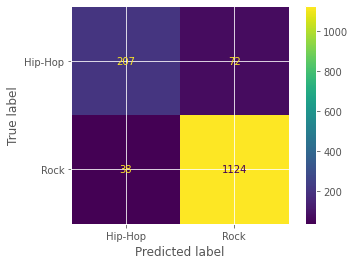

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()

In [ ]:
# Classification Report
print(f"Random Forest: \n {classification_report(y_test, pred)}")

Random Forest: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.74      0.79       279
        Rock       0.94      0.97      0.95      1162

    accuracy                           0.92      1441
   macro avg       0.89      0.85      0.87      1441
weighted avg       0.92      0.92      0.92      1441



Por fim, verificamos a métrica F1 Score.

In [ ]:
print(f"F1 Score: {f1_score(y_test, pred, average='macro')}")

F1 Score: 0.8717133163698049


# 7. Lidando com Dados Desbalanceados

Ao analisarmos a matriz de confusão, notamos que o modelo está errando mais previsões quando se trata de Hip-Hop. Isso acontece porque o nosso dataset está desbalanceado, isto é, há muito mais dados de Rock do que de Hip-Hop. Para verificar o desbalanceamento dos nossos dados, veja o gráfico a seguir.

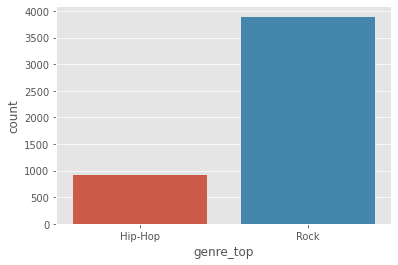

In [ ]:
_ = sns.countplot(data=df_complete, x='genre_top')

In [ ]:
rock = len(df_complete[df_complete['genre_top'] == 'Rock'])
hip_hop = len(df_complete[df_complete['genre_top'] == 'Hip-Hop'])
diferenca = rock/hip_hop
diferenca

4.276923076923077

Observe que há muito mais dados referentes a Rock do que a Hip-Hop - a classe Rock é 4.28 vezes maior do que a classe Hip-Hop -, o que causa um
desbalanceamento significativo nos nossos dados.
<br>
<br>
Para tratar este desbalanceamento, vamos, a princípio, utilizar o class_weight, ou seja, vamos atribuir diferentes pesos a cada classe (Rock e Hip-Hop).

In [ ]:
# rf = RandomForestClassifier(class_weight={0:1, 1:100}
# rf = RandomForestClassifier(class_weight={'balanced'}

from sklearn.metrics import precision_recall_fscore_support

# Vamos definir uma função que irá fazer diversos testes para diferentes pesos

def try_class_weight(class_wight_values):
  numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ("scaler", StandardScaler())])
  preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train.columns)])

  rf_model_balanced = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(class_weight=class_wight_values, random_state=0))])

  rf_model_balanced.fit(X_train, y_train)

  pred = rf_model_balanced.predict(X_test)

  # Matriz de confusão e Acurácia
  cm = confusion_matrix(y_test, pred)
  acc = accuracy_score(y_test, pred)
  acc2 = (cm[0,0] + cm[1,1])/len(y_test) # Veja que estamos calculando a acurácia de forma um tanto quanto 'manual'

  # fscore
  precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='macro')

  return acc2, fscore

In [ ]:
# Testando a nossa função para alguns valores específicos

accuracy, fscore = try_class_weight('balanced')
print("Para 'balanced'")
print(f"Acurácia: {accuracy}")
print(f"F1 Score: {fscore}")
print()

accuracy, fscore = try_class_weight(None)
print("Para 'None'")
print(f"Acurácia: {accuracy}")
print(f"F1 Score: {fscore}")
print()


accuracy, fscore = try_class_weight("balanced_subsample")
print("Para balanced_subsample")
print(f"Acurácia: {accuracy}")
print(f"F1 Score: {fscore}")
print()



accuracy, fscore = try_class_weight({'Rock': 1, 'Hip-Hop':4})
print("Para {'Rock': 1, 'Hip-Hop':4}")
print(f"Acurácia: {accuracy}")
print(f"F1 Score: {fscore}")
print()

Para 'balanced'
Acurácia: 0.919500346981263
F1 Score: 0.8639060769882108

Para 'None'
Acurácia: 0.9208882720333103
F1 Score: 0.8674414326014963

Para balanced_subsample
Acurácia: 0.9174184594031922
F1 Score: 0.8584667471675439

Para {'Rock': 1, 'Hip-Hop':4}
Acurácia: 0.9208882720333103
F1 Score: 0.8650341124198129



Vamos testar vários valores entre 2 e 8 para a classe Hip-Hop, e vamos manter o peso 1  para a classe Rock.

In [ ]:
weights1 = []
weights2 = []
accuracies = []
fscores = []

for w1 in np.linspace(1, 1.5 , 5, endpoint=True):
  for w2 in np.linspace(2, 8, 100, endpoint=True):
    accuracy, fscore = try_class_weight({'Rock': w1, 'Hip-Hop': w2})
    weights1.append(w1)
    weights2.append(w2)
    accuracies.append(accuracy)
    fscores.append(fscore)

In [ ]:
print(f"Melhor Acurácia: {max(accuracies)}")
print(f"Melhor F1 Score: {fscores[accuracies.index(max(accuracies))]}")
print(f"Peso para Rock para melhor acurácia: {weights1[accuracies.index(max(accuracies))]}")
print(f"Peso para Hip-Hop para melhor acurácia: {weights2[accuracies.index(max(accuracies))]}")

Melhor Acurácia: 0.9257460097154754
Melhor F1 Score: 0.8731281324647391
Peso para Rock para melhor acurácia: 1.375
Peso para Hip-Hop para melhor acurácia: 5.818181818181818


Mesmo testando vários pesos diferentes, podemos observar que o modelo não obteve uma melhora extremamente significativa com relação à acurácia do primeiro modelo, sem balanceamento, ou ainda com relação aos outros modelos que foram testados com valores específicos ("balanced", None, "balanced_subsample", e { "Rock" :  1, "Hip-Hop" : 4 }).

# 8. Testando Diversos Outros Tipos de Algoritmos

Agora, vamos testar outros tipos de modelos de machine learning para poder fazer uma comparação da eficiência destes diferentes tipos de modelo com o nosso modelo já estabelecido e testado.

In [ ]:
# Importando os modelos
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
RandomForestClassifier,
AdaBoostClassifier,
GradientBoostingClassifier,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Criando uma lista com todos os modelos importados
classifiers = [KNeighborsClassifier(3), SVC(kernel="rbf", C=0.025, probability=True), SVC(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

# Criando um loop para testar todos os modelos
for classifier in classifiers:
  pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])
  pipe.fit(X_train, y_train)
  print(classifier)
  print(f"Pontuação do modelo: {pipe.score(X_test, y_test):.4f}")
  print()

KNeighborsClassifier(n_neighbors=3)
Pontuação do modelo: 0.8952

SVC(C=0.025, probability=True)
Pontuação do modelo: 0.8626

SVC()
Pontuação do modelo: 0.9119

LogisticRegression()
Pontuação do modelo: 0.8883

DecisionTreeClassifier()
Pontuação do modelo: 0.8744

RandomForestClassifier()
Pontuação do modelo: 0.9237

AdaBoostClassifier()
Pontuação do modelo: 0.9126

GradientBoostingClassifier()
Pontuação do modelo: 0.9174



Veja que, dentre todos os modelos testados, aquele que obteve melhor desempenho foi o RandomForestClassifier, que é justamente o modelo que já estamos utilizando.

# 9. Considerações Finais

Com o teste de diferentes modelos acima, podemos perceber que o algoritmo de RandomForestClassifier perfomou de maneira superior a todos os outros. É claro que os algoritmos testados por último não tiveram seus hiperparâmetros ajustados, mas, como conseguimos uma acurácia de aproximandamente 93% e um f1 score de aproximadamente 87%, podemos concluir que nosso modelo de classificação musical para Hip-Hop e Rock é satisfatório.


Contudo, ainda que nosso modelo tenha alcançado uma performance relativamente boa, acredita-se ser possível melhorá-lo por meio de mais testes de hiperparâmetros e por meio da seleção de features. 